### [Augmentations for Object Detection - Horizontal Flip](https://blog.paperspace.com/data-augmentation-for-bounding-boxes/)

In [1]:
import os
import cv2
import pickle
import random
import numpy as np
import matplotlib.pyplot as plt

Data augmentation - Way of artificially expanding data.

- Stochastic data augmentation - Augmentations happen randomly
- Deterministic data augmentation - Parameters of the augmentation are fixed (constant)

Data augmentation for object detection task requires image as well as the bounding box to be updated. Here is a list of augmentations:

- Horizontal Flip
- Scaling and Translating
- Rotation
- Shearing
- Resizing for input to CNN

Format for storing object detection annotation - For each image with $N$ bounding boxes, the annotations can be stored in an array of size $N \times 5$, where the 5 columns are:

- $x_1$ - Top left $x$ coordinate
- $y_1$ - Top left $y$ coordinate
- $x_2$ - Bottom right $x$ coordinate
- $y_2$ - Bottom right $y$ coordinate
- $c$ - Class of the object

In [2]:
def draw_box(img, coords):
    """
    Function to draw bounding boxes on image.
    """
    img = img.copy()
    coords = coords.reshape(-1, 5)
    for coord in coords:
        ul_pt = (int(coord[0]), int(coord[1]))  # Upper left point
        br_pt = (int(coord[2]), int(coord[3]))  # Bottom right point
        if int(coord[4]) == 0:
            color = [255, 255, 255]
        else:
            color = [255, 255, 0]
        
        img = cv2.rectangle(img.copy(), ul_pt, br_pt, color, 
                            int(max(img.shape[:2])/200))
    return img

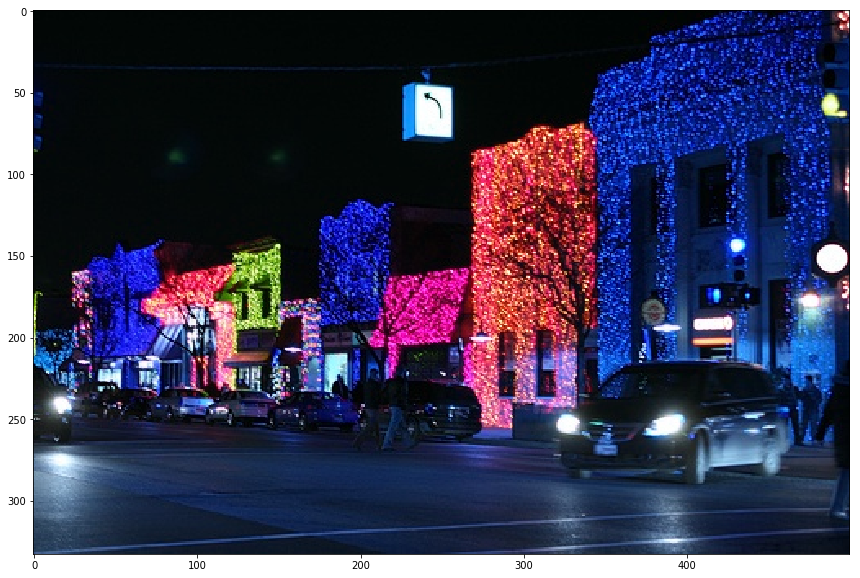

In [3]:
# Sample image from Pascal VOC with bounding box
img = cv2.imread('002244.jpg')

bboxes = np.array([[317, 215, 465, 292, 0],
                   [144, 233, 201, 266, 0],
                   [200, 227, 274, 263, 0],
                   [197, 217, 217, 272, 1],
                   [479, 214, 500, 319, 1]])
plt.figure(figsize=(20,10))
plt.imshow(img)

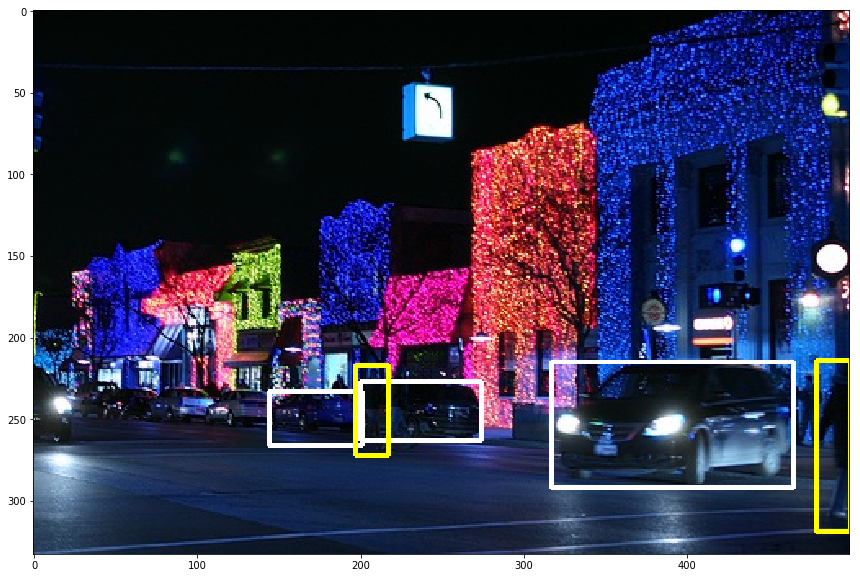

In [4]:
# Draw bounding boxes
img_bb = draw_box(img, bboxes)
plt.figure(figsize=(20,10))
plt.imshow(img_bb)

In [5]:
class HorizontalFlip:
    """
    Horizontally flip the image with probability p
    """
    def __init__(self, p=1): # p = 1 is deterministic
        self.p = p
        
    def __call__(self, img, bboxes):
        img_ctr = np.array(img.shape[:2])[::-1]/2
        img_ctr = np.hstack((img_ctr, img_ctr))
        if random.random() < self.p:
            # Flip image
            img = img[:,::-1,:]
            bboxes[:,[0, 2]] += 2 * (img_ctr[[0, 2]] - bboxes[:, [0, 2]]).astype(int)
            box_w = abs(bboxes[:, 0] - bboxes[:, 2])
            # Convert UR x1 to UL x1 and BL x2 to BR x2
            bboxes[:, 0] -= box_w
            bboxes[:, 2] += box_w
            
        return img, bboxes

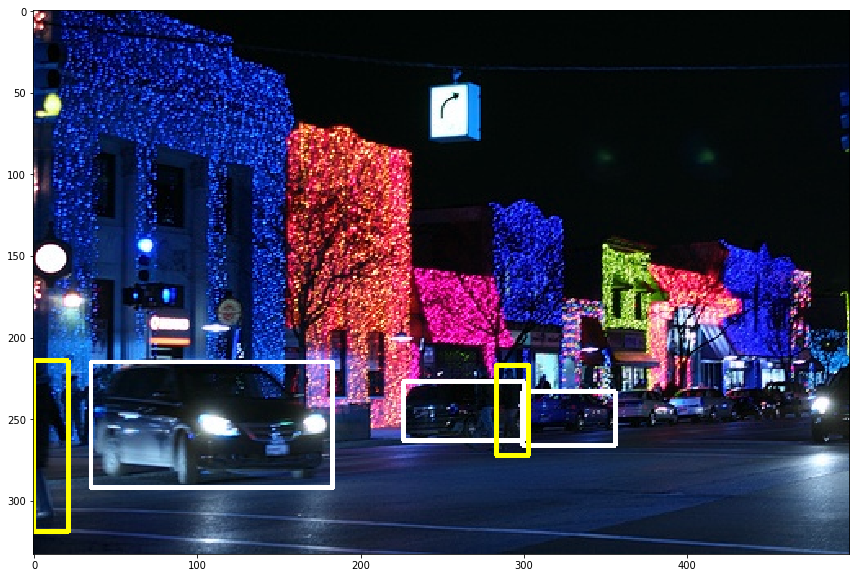

In [6]:
# Test horizontal flip
h_flipper = HorizontalFlip(p=1)
f_img, f_bboxes = h_flipper(img, bboxes)
plt.figure(figsize=(20,10))
plt.imshow(draw_box(f_img, f_bboxes))

### Scratch

In [7]:
# Image center
ctr = np.array(img.shape[:2])
print('original: ', ctr)
ctr = ctr[::-1]
print('h flipped: ', ctr)
ctr = ctr/2
print('center: ', ctr)

original:  [333 500]
h flipped:  [500 333]
center:  [250.  166.5]


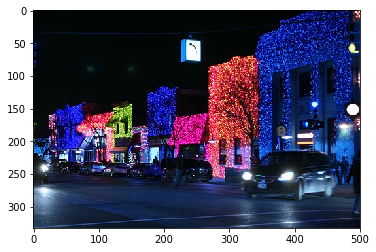

In [8]:
# Original image
img = cv2.imread('002244.jpg')
plt.imshow(img)

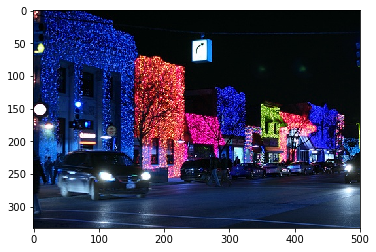

In [9]:
# Flipped image
f_img = img[:, ::-1, :]
plt.imshow(f_img)

In [10]:
# Flipping bboxes
bboxes = np.array([[317, 215, 465, 292, 0],
                   [144, 233, 201, 266, 0],
                   [200, 227, 274, 263, 0],
                   [197, 217, 217, 272, 1],
                   [479, 214, 500, 319, 1]])

f_bboxes = bboxes

In [11]:
# Image center
img_ctr = np.array(img.shape[:2])[::-1]/2
img_ctr = np.hstack((img_ctr, img_ctr))  # Repeat image center
print(img_ctr)

[250.  166.5 250.  166.5]


In [12]:
# Find distance between image center x and bounding box UL x coordinates
f_bboxes[:, [0, 2]] += 2 * (img_ctr[[0, 2]] - f_bboxes[:, [0, 2]]).astype(int)  # 2 * gives distance from original x1
f_bboxes

array([[183, 215,  35, 292,   0],
       [356, 233, 299, 266,   0],
       [300, 227, 226, 263,   0],
       [303, 217, 283, 272,   1],
       [ 21, 214,   0, 319,   1]])

In [13]:
# Flipped boxes -> x1 is UR corner, subtract box width, x2 is BL corner
# Find boxes widths
bbox_w = abs(bboxes[:,0] - bboxes[:,2])
bbox_w

array([148,  57,  74,  20,  21])

In [14]:
# Convert UR x1 to UL x1 and BL x2 to BR x2
f_bboxes[:,0] -= bbox_w
f_bboxes[:, 2] += bbox_w
f_bboxes

array([[ 35, 215, 183, 292,   0],
       [299, 233, 356, 266,   0],
       [226, 227, 300, 263,   0],
       [283, 217, 303, 272,   1],
       [  0, 214,  21, 319,   1]])

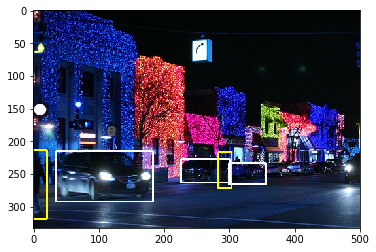

In [15]:
# Plot flipped image with flipped bounding box
plt.imshow(draw_box(f_img, f_bboxes))